# Introduction

* Aim of this notebook is to run a good EDA on fMNIST dataset, train a neural network using Tensorflow.

# Obtaining the Data

## Load the dataset & required libraries

In [266]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df_training = pd.read_csv('data/fashion-mnist_train.csv')
df_train = df_training.to_numpy()
df_testing = pd.read_csv('data/fashion-mnist_test.csv')
df_test = df_testing.to_numpy()

# Data Preprocessing

## Split Data 

In [267]:
# Split the data into features and labels

train_labels  = df_train[:,0]
train_features = df_train[:,1:]
test_labels  = df_test[:,0]
test_features = df_test[:,1:]

print(f'Image DType: {type(train_features)}')
print(f'Image Element DType: {type(train_features[0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_features.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  
print(f'Images: {test_features.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_features.min()}')
print(f'Max: {train_features.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.int64'>
Label Element DType: <class 'numpy.int64'>
**Shapes:**
Train Data:
Images: (60000, 784)
Labels: (60000,)
Test Data:
Images: (10000, 784)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


## Reshaping & Normalizing the data

In [268]:
train_images = train_features.reshape((60000, 28 * 28))  
test_images = test_features.reshape((10000, 28 * 28))

train_images = train_images.astype("float32") / 255  
test_images = test_images.astype("float32") / 255

In [269]:
print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0.0
1.0
(60000, 784)
(784,)


# Exploratory Data Analysis

## First 10 Images 

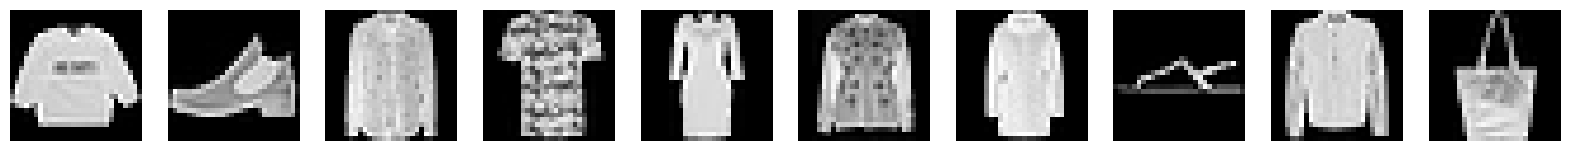

In [270]:
fig, axes = plt.subplots(1, 10, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()

## Let understand the class distribution : Frequency 

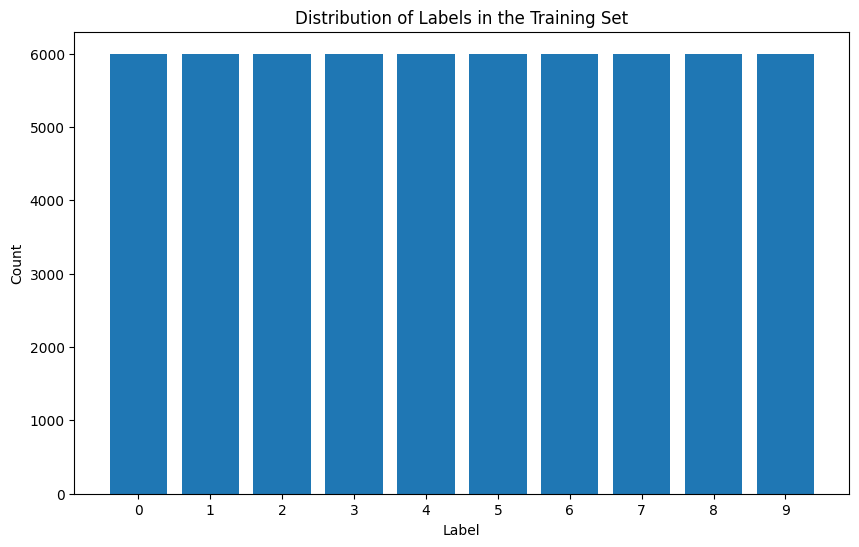

In [271]:
labels, counts = np.unique(df_training['label'], return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.title('Distribution of Labels in the Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(labels)
plt.show()

# Creating the Model

In [272]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model

In [273]:
model.compile(optimizer="rmsprop",  
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model

In [274]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.5653 - accuracy: 0.7972
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3914 - accuracy: 0.8580
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3444 - accuracy: 0.8730
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3184 - accuracy: 0.8820
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2984 - accuracy: 0.8904


# Model Evaluation with validation set

## Accuracy

In [275]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
                            train_images, train_labels, 
                            test_size=0.2, random_state=0)

# Make predictions
y_pred_probs = model.predict(x_val)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
print(y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy of the model is {accuracy:.3f}')

375/375 [==============================] - 1s 1ms/step
[1 6 8 ... 8 9 3]
Accuracy of the model is 0.898


## Precison,Recall & F1 Score for each class

In [276]:
from sklearn.metrics import precision_score, recall_score, f1_score

my_class = np.unique(y_train)
prec = []
recall = []
f1= []
for i in my_class:
    # Filter predictions and  labels for the current class
    y_cls_pred = (y_pred == i)
    y_cls_true = (y_val == i)
    
    # Calculate precision, recall, and F1-score for the current class
    precision_i = precision_score(y_cls_true, y_cls_pred)
    recall_i = recall_score(y_cls_true, y_cls_pred)
    f1_i = f1_score(y_cls_true, y_cls_pred)

    # appending values to list

    prec.append(precision_i)
    recall.append(recall_i)
    f1.append(f1_i)
results = {'Class': my_class, 'Precision': prec, 'Recall': recall, 'F1-score': f1}
df_results = pd.DataFrame(results)
df_results

,Class,Precision,Recall,F1-score
0,0,0.836687,0.909167,0.871423
1,1,0.984925,0.989066,0.986991
2,2,0.882470,0.735880,0.802536
3,3,0.923825,0.904762,0.914194
4,4,0.723208,0.910596,0.806156
5,5,0.994751,0.957071,0.975547
6,6,0.819473,0.676151,0.740945
7,7,0.898744,0.987069,0.940838
8,8,0.974652,0.985124,0.979860
9,9,0.984942,0.928989,0.956148


## Run on Test Set & Conclusions

In [277]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Set Accuracy is : {test_acc:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.8779
Test Set Accuracy is : 0.878


# Increase the precison for class '5'

* To increase the precision for class '5', adjust the classification threshold for this class.
* By default, the model classifies an instance as class '5' if the predicted probability is the highest among all classes. 
* To increase precision, we can require a higher probability for class '5' to make a positive classification, thereby reducing false positives.

In [289]:
# Predict probabilities for the test set
class5_prob = model.predict(test_images)

# higher threshold for class '5'
threshold = 0.9 # Adjust this value as needed

# Apply the new threshold for class '5'
y_pred_adjusted = np.array([5 if prob[5] >= threshold else np.argmax(prob) for prob in class5_prob])

precision = precision_score(test_labels, y_pred_adjusted, labels=[5], average='micro')
print(f'Adjusted Precision for class 5: {precision}')

313/313 [==============================] - 0s 1ms/step
Adjusted Precision for class 5: 0.985854189336235


# Increase the Recall

* To increase the recall for class '5' without changing the model or retraining, we have to adjust the prediction threshold. 
* By decreasing the threshold, make the criteria for predicting class '5' less stringent, which can increase recall at the cost of precision.

In [279]:
# lower threshold for class '5'
threshold = 0.01  # Adjust this value as needed

# Apply the new threshold for class '5'
y_pred_adjusted = np.array([5 if prob[5] >= threshold else np.argmax(prob) for prob in class5_prob])

from sklearn.metrics import recall_score
recall = recall_score(test_labels, y_pred_adjusted, labels=[5], average='micro')
print(f'Adjusted Recall for class 5: {recall}')

Adjusted Recall for class 5: 0.979
